## Max drawdown

Max drawdown is the maximum loss from the previous high to a subsequent low

Buy at its highest value - Sold at the bottom

$$ Max drawdown = Buy_{highest} - Sold_{lowest} $$

Steps to compute max drawdown
1. Construct a wealth index
2. Look at peaks and bottoms
3. Compute drawdown (% of the previous peak)

<AxesSubplot:>

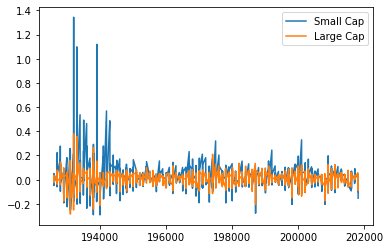

In [1]:
import pandas as pd
import numpy as np

me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', header=0, index_col=0, parse_dates=True, na_values=-99.99)

returns = me_m[['Lo 10', 'Hi 10']]

returns.columns = ['Small Cap', 'Large Cap']

returns = returns / 100

returns.plot.line()

## Forcing the index to a datetime format

In [2]:
returns.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

This yields that the index column is int64 instead of datetime

In [3]:
returns.index = pd.to_datetime(returns.index, format='%Y%m')

returns.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

Now let's convert the date to show only year and month (not the day)

In [4]:
returns.index = returns.index.to_period('M') # The timestamps should be used as a month

returns.head()

,Small Cap,Large Cap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


## Compute drawdowns

<AxesSubplot:>

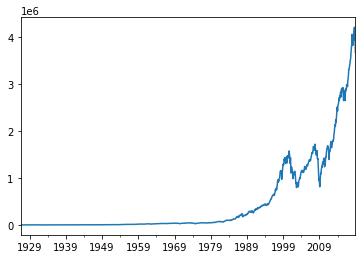

In [5]:
wealth_index = 1000 * (1 + returns['Large Cap']).cumprod()

wealth_index.plot()

<AxesSubplot:>

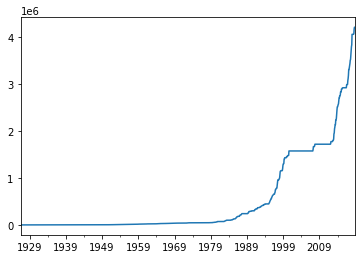

In [6]:
prev_peaks = wealth_index.cummax()

prev_peaks.plot()

<AxesSubplot:>

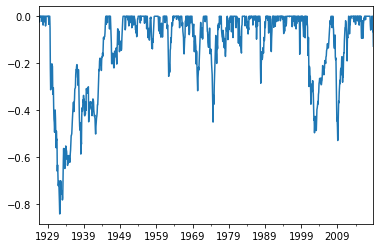

In [7]:
drawdown = (wealth_index - prev_peaks) / prev_peaks

drawdown.plot()

In [8]:
drawdown.min()

-0.8400375277943123

In [9]:
drawdown['1975':].min()

-0.5280945042309304

When did it happen?

In [10]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

### Let's calculate the drawdown for the Small Cap index

Let's use a function to do that

In [11]:
def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    The wealth index
    The previous peaks
    Percent Drawdowns
    :param return_series:
    :return: Wealth index, previous peaks, drawdowns
    """

    wealth_index = 1000 * (1 + return_series).cumprod()

    previous_peaks = wealth_index.cummax()

    drawdowns = (wealth_index - previous_peaks) / previous_peaks

    return pd.DataFrame({
        'Wealth': wealth_index,
        'Peaks': previous_peaks,
        'Drawdown': drawdowns
    })

In [12]:
drawdown(returns['Large Cap'])

,Wealth,Peaks,Drawdown
1926-07,1.032900e+03,1.032900e+03,0.000000
1926-08,1.071117e+03,1.071117e+03,0.000000
1926-09,1.078294e+03,1.078294e+03,0.000000
1926-10,1.052091e+03,1.078294e+03,-0.024300
1926-11,1.080498e+03,1.080498e+03,0.000000
...,...,...,...
2018-08,4.175915e+06,4.175915e+06,0.000000
2018-09,4.212246e+06,4.212246e+06,0.000000
2018-10,3.935501e+06,4.212246e+06,-0.065700
2018-11,4.035069e+06,4.212246e+06,-0.042062


Let's plot it

<AxesSubplot:>

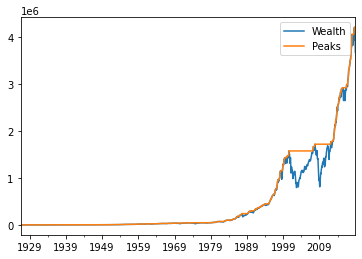

In [13]:
drawdown(returns['Large Cap'])[['Wealth', 'Peaks']].plot()

If we want to see up to 1950

<AxesSubplot:>

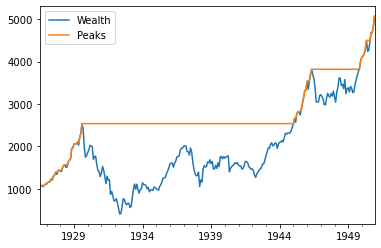

In [14]:
drawdown(returns[:'1950']['Large Cap'])[['Wealth', 'Peaks']].plot()

In [15]:
drawdown(returns['Large Cap'])['Drawdown'].min()

-0.8400375277943123

In [16]:
drawdown(returns['Large Cap'])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [18]:
drawdown(returns['Small Cap'])['Drawdown'].min()

-0.8330007793945303

In [19]:
drawdown(returns['Small Cap'])['Drawdown'].idxmin()

Period('1932-05', 'M')